![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Face Mask Prediction using U-Net - by Sandesh Balyan
Task is to predict the mask around the face in a given image.

## Dataset
Faces in images marked with bounding boxes. Have around 409 images with around 1000 faces manually tagged via bounding box.
- Data file name: images.npy

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [ ]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.3.0'

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
import tensorflow.keras as keras
import random
import cv2
import warnings
warnings.filterwarnings('ignore')
from PIL import Image

from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/gdirve')

Mounted at /content/gdirve


### Load the "images.npy" file 
- This file contains images with details of bounding boxes

In [ ]:
import numpy as np
data = np.load('/content/gdirve/My Drive/Colab Notebooks/02-project-FaceMaskDetection/images.npy',allow_pickle=True)


In [ ]:
data.shape

(409, 2)

### Check one sample from the loaded "images.npy" file

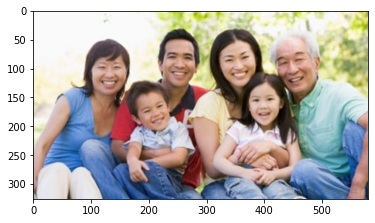

In [ ]:
plt.imshow(data[4][0])

In [ ]:
print(data[4][1])

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.5586206896551724, 'y': 0.19938650306748465}, {'x': 0.6603448275862069, 'y': 0.3773006134969325}], 'imageWidth': 580, 'imageHeight': 326}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.38620689655172413, 'y': 0.18711656441717792}, {'x': 0.4896551724137931, 'y': 0.4049079754601227}], 'imageWidth': 580, 'imageHeight': 326}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.1724137931034483, 'y': 0.23006134969325154}, {'x': 0.2775862068965517, 'y': 0.44171779141104295}], 'imageWidth': 580, 'imageHeight': 326}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.7155172413793104, 'y': 0.19938650306748465}, {'x': 0.8448275862068966, 'y': 0.41411042944785276}], 'imageWidth': 580, 'imageHeight': 326}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.2982758620689655, 'y': 0.44171779141104295}, {'x': 0.4189655172413793, 'y': 0.6533742331288344}], 'imageWidth': 580, 'imageHeight': 326}, {'label': ['Face'], 'notes': '', 'points': [{'

### Set image dimensions
- Initialize image height, image width with value: 224 

In [ ]:
# Why did we restrict to image size 224 because mobile net is trained on this size of the image
IMAGE_HEIGHT=224
IMAGE_WIDTH=224

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X" array
- Masks will be stored in "masks" array

In [ ]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

In [ ]:
X.shape

(409, 224, 224, 3)

In [ ]:
masks.shape

(409, 224, 224)

### Split the data into training and testing
- 400 images in training
- 9 images in testing data

Training data

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,masks,test_size=0.02)

In [ ]:
print("Shape of X_train",X_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train (400, 224, 224, 3)
Shape of X_test (9, 224, 224, 3)
Shape of y_train (400, 224, 224)
Shape of y_test (9, 224, 224)


### Print a sample training image, image array and its mask

Print the image and image array

In [ ]:
#### Add your code here ####
X_train[169]

array([[[-0.75686276, -0.78823531, -0.81176472],
        [-0.9137255 , -0.92156863, -0.94509804],
        [-0.92156863, -0.92941177, -0.94509804],
        ...,
        [-0.56862748, -0.63921571, -0.70980394],
        [-0.58431375, -0.65490198, -0.72549021],
        [-0.60784316, -0.67843139, -0.74901962]],

       [[-0.7647059 , -0.80392158, -0.82745099],
        [-0.92156863, -0.92941177, -0.95294118],
        [-0.92156863, -0.92941177, -0.94509804],
        ...,
        [-0.57647061, -0.64705884, -0.71764708],
        [-0.59215689, -0.66274512, -0.73333335],
        [-0.6156863 , -0.68627453, -0.75686276]],

       [[-0.78039217, -0.79607844, -0.82745099],
        [-0.92156863, -0.92941177, -0.95294118],
        [-0.92156863, -0.92941177, -0.94509804],
        ...,
        [-0.56862748, -0.63921571, -0.70980394],
        [-0.59215689, -0.66274512, -0.73333335],
        [-0.60784316, -0.67843139, -0.74901962]],

       ...,

       [[-0.90588236, -0.9137255 , -0.92941177],
        [-0

In [ ]:
y_train[169]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


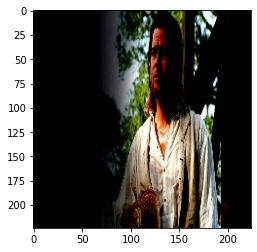

In [ ]:
plt.imshow(X_train[169])

Print the mask

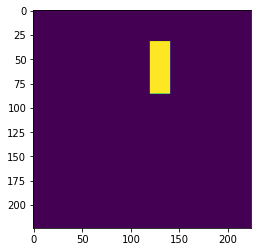

In [ ]:
#### Add your code here ####
plt.imshow(y_train[169])

## Create the model
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers


In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Reshape, UpSampling2D, Concatenate, Conv2D
from tensorflow.keras.models import Model

def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0, weights="imagenet")

    for layer in model.layers:
        layer.trainable = trainable
  
    #### Add your code here ####
    ck = model.get_layer("conv_pw_1_relu").output
    block0 = model.get_layer("conv_pw_1_relu").output 
    block1 = model.get_layer("conv_pw_3_relu").output
    block2 = model.get_layer("conv_pw_5_relu").output
    block3 = model.get_layer("conv_pw_11_relu").output
    block4 = model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block4), block3])
    x = Concatenate()([UpSampling2D()(x), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
    x = Concatenate()([UpSampling2D()(x), block0])
    #x = Concatenate()([UpSampling2D()(x), block0])
    x = UpSampling2D()(x)
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)

    x = Reshape((IMAGE_HEIGHT, IMAGE_HEIGHT))(x)

    return Model(inputs=model.input, outputs=x)

### Call the create_model function
- Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)

In [ ]:
#### Add your code here ####
model = create_model(trainable=False)

### Print model summary

In [ ]:
#### Add your code here ####
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
_______________________________________________________________________________________

### Define dice coefficient function
- Create a function to calculate dice coefficient


In [ ]:
#### Add your code here ####
def dice_coefficient(y_true,y_pred):
  num = 2*tensorflow.reduce_sum(y_true*y_pred)
  denom = 2*tensorflow.reduce_sum(y_true+y_pred)
  return num / (denom + tensorflow.keras.backend.epsilon())
  

### Define loss function

In [ ]:
#### Add your code here ####
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tensorflow.keras.backend.log(dice_coefficient(y_true, y_pred) + tensorflow.keras.backend.epsilon())


### Compile the model
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [ ]:
#### Add your code here ####
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

optimizer = Adam(lr=1e-3,beta_1=0.9,beta_2=0.999,epsilon=None,decay=0.0,amsgrad=False)
model.compile(loss=loss,optimizer=optimizer,metrics=[dice_coefficient])

### Define callbacks (3 marks)
- Use ModelCheckpoint
- Use EarlyStopping
- Use ReduceLROnPlateau

In [ ]:
#### Add your code here ####
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("model-{val_loss:.2f}.h5",monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=True)

stop = EarlyStopping(monitor='val_loss',patience=5)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=5,min_lr=1e-6,verbose=1)

### Fit the model
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: use the callbacks defined above

In [ ]:
#### Add your code here ####
training = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=32,batch_size=1,verbose=1,callbacks=[checkpoint,stop,reduce_lr])

Epoch 1/32
400/400 [==============================] - ETA: 0s - loss: 1.8693 - dice_coefficient: 0.2448
Epoch 00001: val_loss improved from inf to 1.44680, saving model to model-1.45.h5
400/400 [==============================] - 243s 608ms/step - loss: 1.8693 - dice_coefficient: 0.2448 - val_loss: 1.4468 - val_dice_coefficient: 0.2870
Epoch 2/32
400/400 [==============================] - ETA: 0s - loss: 1.5853 - dice_coefficient: 0.2884
Epoch 00002: val_loss improved from 1.44680 to 1.42850, saving model to model-1.43.h5
400/400 [==============================] - 243s 607ms/step - loss: 1.5853 - dice_coefficient: 0.2884 - val_loss: 1.4285 - val_dice_coefficient: 0.2941
Epoch 3/32
400/400 [==============================] - ETA: 0s - loss: 1.5361 - dice_coefficient: 0.2980
Epoch 00003: val_loss improved from 1.42850 to 1.39136, saving model to model-1.39.h5
400/400 [==============================] - 244s 609ms/step - loss: 1.5361 - dice_coefficient: 0.2980 - val_loss: 1.3914 - val_dice_c

Insights
Since validation loss has not improved from 1.3916, earlty stopping is done after Epoch number 8

Final Validation Loss = 1.5286 and dice coefficient being 0.2823

In [ ]:
def plot_graph(history,string):
    plt.figure(figsize=(16,7))
    plt.plot(history.history[string],label=str(string))
    plt.plot(history.history["val_"+str(string)],label=str(string))
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string,"val_"+string])
    plt.show()

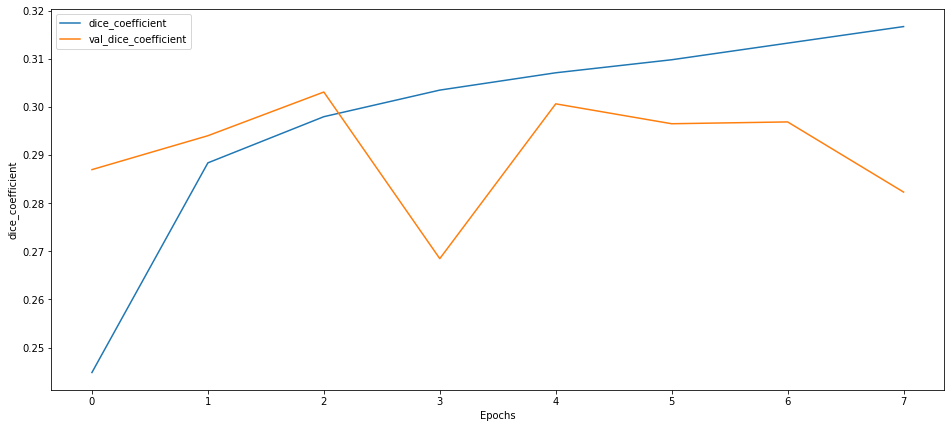

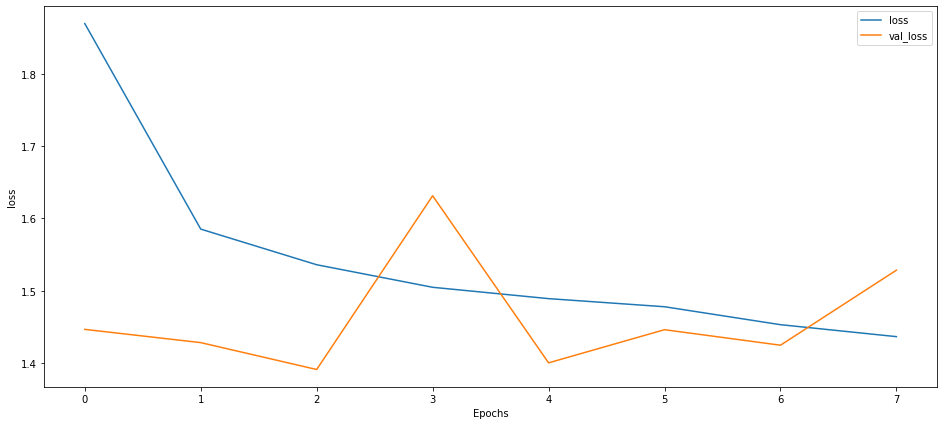

In [ ]:
plot_graph(training,"dice_coefficient")
plot_graph(training,"loss")

Inisghts:
Best validation loss and val dice coefficient was at epoch 2 with lr 1e-3

### Get the predicted mask for a test image 

Show the test image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


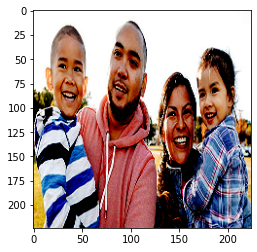

In [ ]:
#### Add your code here ####
plt.imshow(X_test[7])

Show original mask for test image

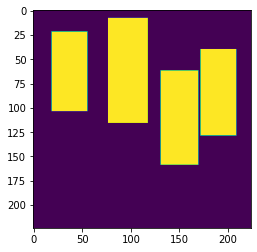

In [ ]:
#### Add your code here ####
plt.imshow(y_test[7])

Predict the mask on the test image

In [ ]:
#### Add your code here ####
pred_mask = model.predict(X_test)
pred_mask

array([[[7.40600692e-10, 7.40600692e-10, 5.02987596e-10, ...,
         6.87360195e-12, 1.05391659e-11, 1.05391659e-11],
        [7.40600692e-10, 7.40600692e-10, 5.02987596e-10, ...,
         6.87360195e-12, 1.05391659e-11, 1.05391659e-11],
        [6.15826723e-10, 6.15826723e-10, 1.06552966e-09, ...,
         1.45610225e-11, 6.24432060e-12, 6.24432060e-12],
        ...,
        [1.14540972e-13, 1.14540972e-13, 1.98184039e-13, ...,
         2.68581002e-14, 1.15177541e-14, 1.15177541e-14],
        [1.80028518e-13, 1.80028518e-13, 1.18127987e-13, ...,
         1.60088228e-14, 2.41189261e-14, 2.41189261e-14],
        [1.80028518e-13, 1.80028518e-13, 1.18127987e-13, ...,
         1.60088228e-14, 2.41189261e-14, 2.41189261e-14]],

       [[2.19310787e-05, 2.19310787e-05, 1.60876079e-05, ...,
         5.25661903e-07, 6.09349456e-07, 6.09349456e-07],
        [2.19310787e-05, 2.19310787e-05, 1.60876079e-05, ...,
         5.25661903e-07, 6.09349456e-07, 6.09349456e-07],
        [2.85779715e-05, 

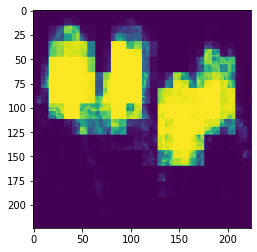

In [ ]:

plt.imshow(pred_mask[7])

### Impose the mask on the test image
- In imshow use the alpha parameter and set it to greater than 0.5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


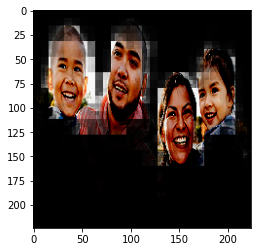

In [ ]:
#### Add your code here ####
image = X_test[7]
image2 = image

image2[:,:,0] = pred_mask[7]*image[:,:,0]
image2[:,:,1] = pred_mask[7]*image[:,:,1]
image2[:,:,2] = pred_mask[7]*image[:,:,2]
out_img = image2

plt.imshow(out_img)

Conclusion:
1. When learning rate was 1e-1 with 1 epoch loss was too high
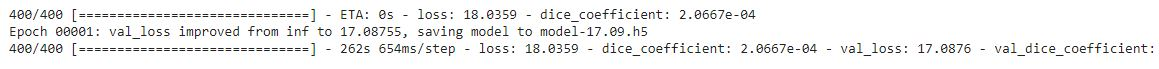

2. when learning rate was 1e-3 with 2 epoch there was hughe improvement as comapred to 1e-1
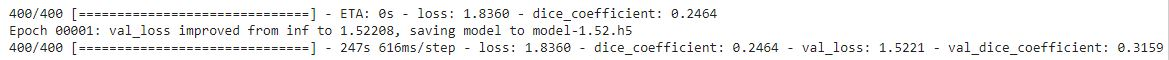

3. When 32 epochs were used with lr=1e-3 there was slight improvement in dice coefficient and val loss. Early stop was applied after 8th epoch due to non improvement in the val loss. 

4. Prediction masks seems to be acceptable but there are considerable opportunity for improvement